C:\Users\15514\AppData\Local\Temp\ipykernel_30228\802665424.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_ratio.index, y=missing_ratio.values, palette='viridis')


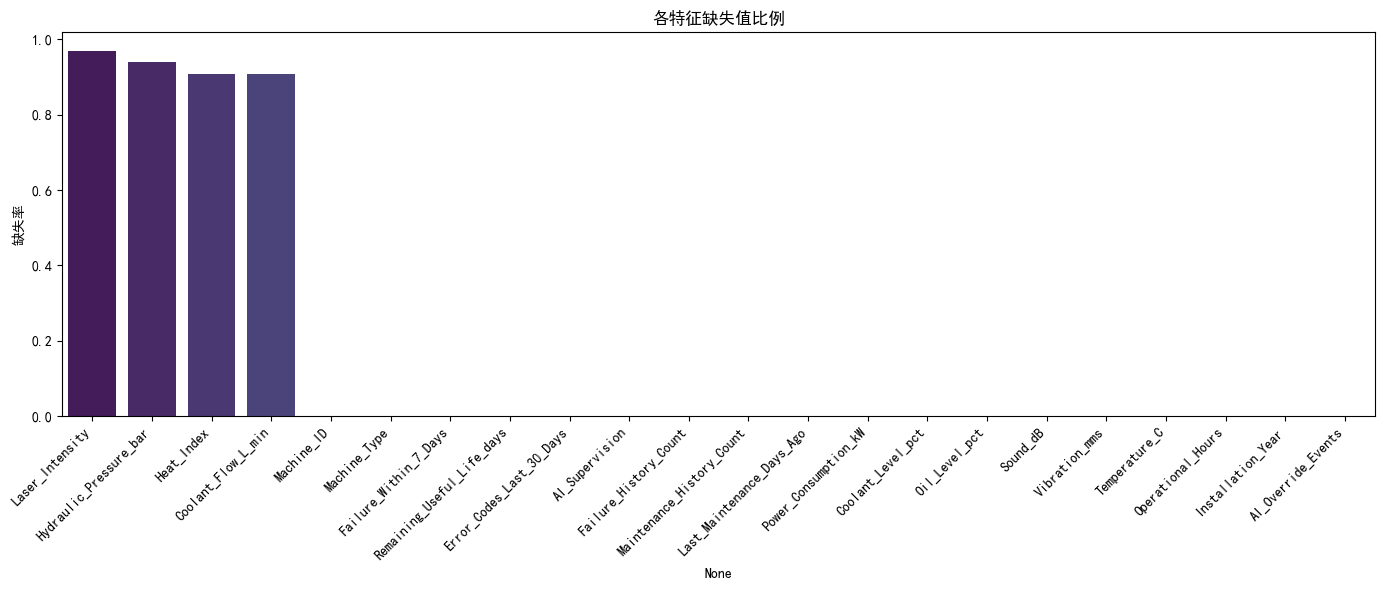

                                  各特征缺失率（从高到低）                                  
           特征名称             缺失率  
           Laser_Intensity 96.99%
    Hydraulic_Pressure_bar 93.96%
                Heat_Index 90.92%
        Coolant_Flow_L_min 90.86%
                Machine_ID  0.00%
              Machine_Type  0.00%
     Failure_Within_7_Days  0.00%
Remaining_Useful_Life_days  0.00%
  Error_Codes_Last_30_Days  0.00%
            AI_Supervision  0.00%
     Failure_History_Count  0.00%
 Maintenance_History_Count  0.00%
 Last_Maintenance_Days_Ago  0.00%
      Power_Consumption_kW  0.00%
         Coolant_Level_pct  0.00%
             Oil_Level_pct  0.00%
                  Sound_dB  0.00%
             Vibration_mms  0.00%
             Temperature_C  0.00%
         Operational_Hours  0.00%
         Installation_Year  0.00%
        AI_Override_Events  0.00%


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# -------------------------------------------------------------------
# 1. 数据读取
# -------------------------------------------------------------------
file_path =r'D:\桌面\2025年第四届“创新杯”（原钉钉杯）大学生大数据挑战赛初赛题目\2025年第四届“创新杯”（原钉钉杯）大学生大数据挑战赛初赛题目\A题\data\train_data.csv'
df = pd.read_csv(file_path)

# -------------------------------------------------------------------
# 2. 设置中文字体和负号正常显示
# -------------------------------------------------------------------
matplotlib.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']  # 支持中文
matplotlib.rcParams['axes.unicode_minus'] = False                      # 解决负号 '-' 显示为方块

# -------------------------------------------------------------------
# 3. 配置显示格式（文字版输出）
# -------------------------------------------------------------------
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.float_format', '{:.2%}'.format)  # 浮点数按百分比格式

# -------------------------------------------------------------------
# 4. 缺失值分析 —— 图 + 文字版
# -------------------------------------------------------------------
# 4.1 计算缺失率
missing_ratio = df.isnull().mean().sort_values(ascending=False)

# 4.2 绘制柱状图
plt.figure(figsize=(14, 6))
sns.barplot(x=missing_ratio.index, y=missing_ratio.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('缺失率')
plt.title('各特征缺失值比例')
plt.tight_layout()
plt.savefig('missing_ratio.png', dpi=300)   # 保存高分辨率图像，用于论文
plt.show()

# 4.3 文字版输出
print('=' * 80)
print('各特征缺失率（从高到低）'.center(80))
print('=' * 80)
miss_df = pd.DataFrame({
    '特征名称': missing_ratio.index,
    '缺失率': missing_ratio.values
})
# 将缺失率格式化为百分比，保留两位小数
miss_df['缺失率'] = miss_df['缺失率'].apply(lambda x: f"{x:.2%}")
print(miss_df.to_string(index=False))
print('=' * 80)


In [13]:
# 删除高缺失特征
df.drop(columns=['Laser_Intensity','Hydraulic_Pressure_bar','Heat_Index','Coolant_Flow_L_min'], inplace=True)

# 之后再进行异常值、重复值、分布分析等步骤


In [14]:
# 3. 观察各特征基本描述统计（针对数值和类别特征分别）
print("\n数值型特征描述统计：")
print(df.select_dtypes(include=['int64','float64']).describe().T)

print("\n类别型特征值计数示例（前5列）：")
for col in df.select_dtypes(include=['object','category']).columns[:5]:
    print(f"\n{col} 取值统计：")
    print(df[col].value_counts(dropna=False).head(10))


数值型特征描述统计：
                               count        mean         std        min         25%         50%         75%     \
Installation_Year          40000000.00%  201995.01%    1182.96% 200000.00%  201000.00%  202000.00%  203000.00%   
Operational_Hours          40000000.00% 5003394.62% 2887046.32%      0.00% 2506000.00% 5001100.00% 7502700.00%   
Temperature_C              40000000.00%    5999.48%    1498.71%  -1573.00%    4989.00%    6000.00%    7005.00%   
Vibration_mms              40000000.00%     999.25%     499.77%  -1395.00%     662.00%    1000.00%    1336.00%   
Sound_dB                   40000000.00%    7499.43%     999.41%   2365.00%    6827.00%    7499.00%    8172.00%   
Oil_Level_pct              40000000.00%    6946.85%    1885.62%      0.00%    5655.00%    7002.00%    8357.00%   
Coolant_Level_pct          40000000.00%    6412.98%    2314.80%      0.00%    4812.00%    6500.00%    8188.00%   
Power_Consumption_kW       40000000.00%   15002.50%    7994.93% -22274.00%  

数据集中重复行数: 0


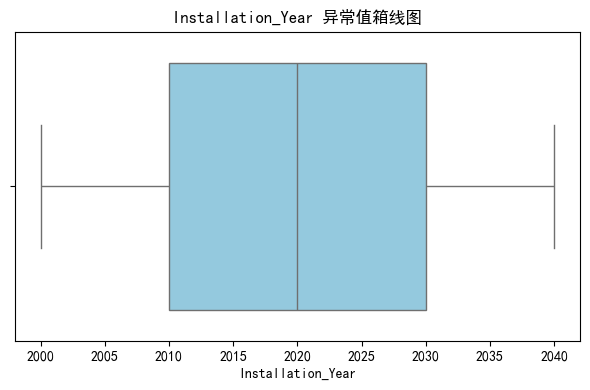

Installation_Year 异常值数量: 0


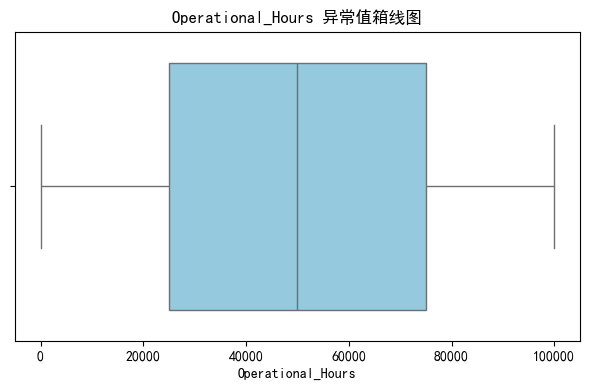

Operational_Hours 异常值数量: 0


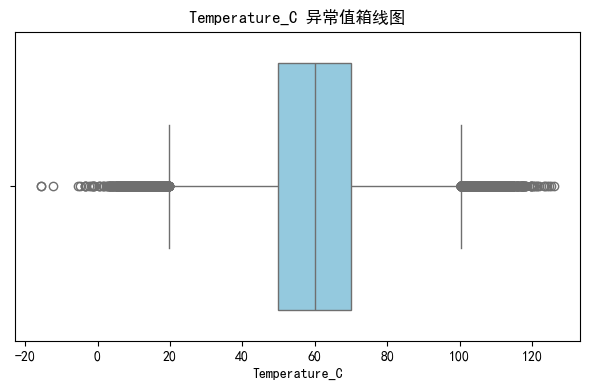

Temperature_C 异常值数量: 2860


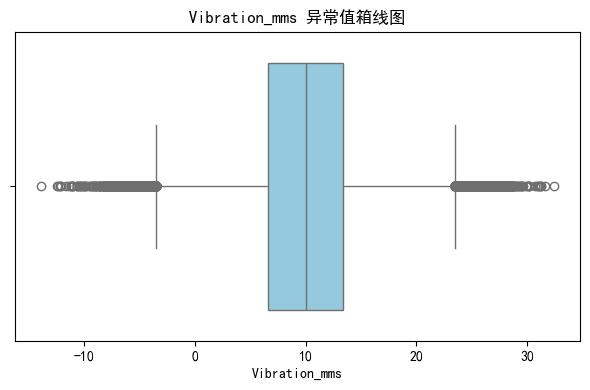

Vibration_mms 异常值数量: 2754


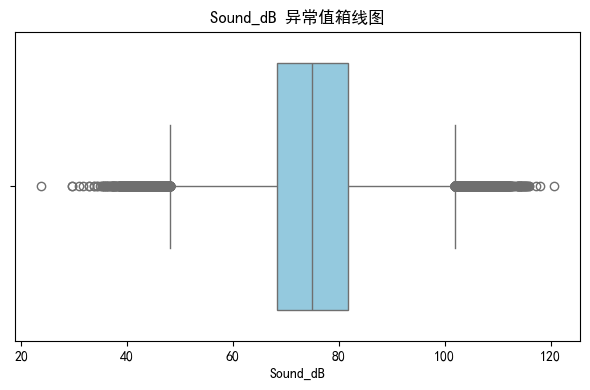

Sound_dB 异常值数量: 2924


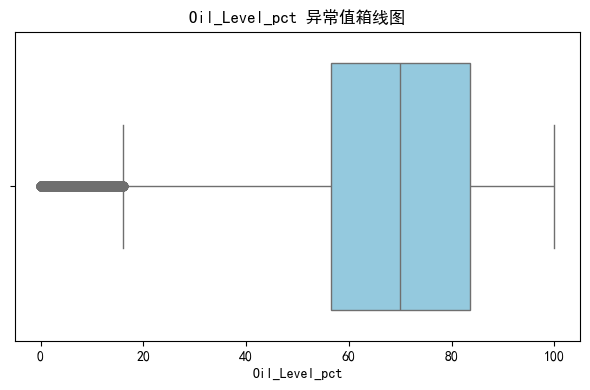

Oil_Level_pct 异常值数量: 1374


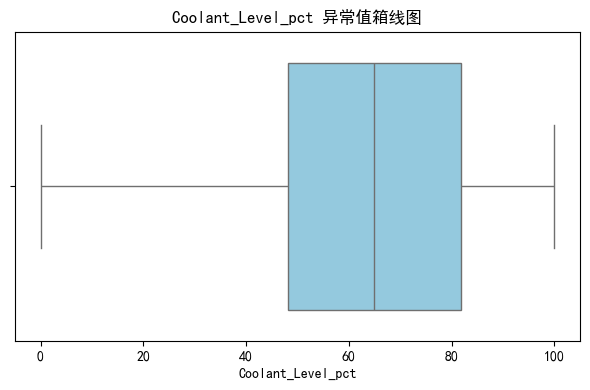

Coolant_Level_pct 异常值数量: 0


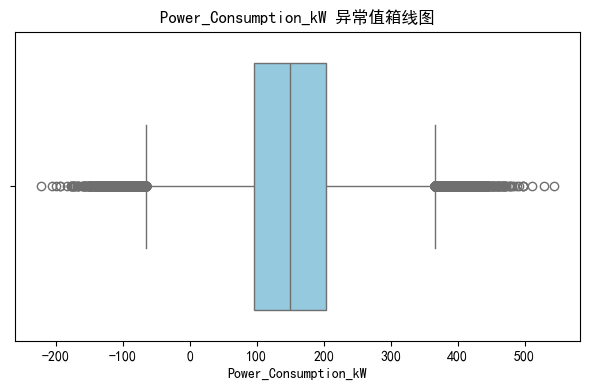

Power_Consumption_kW 异常值数量: 2830


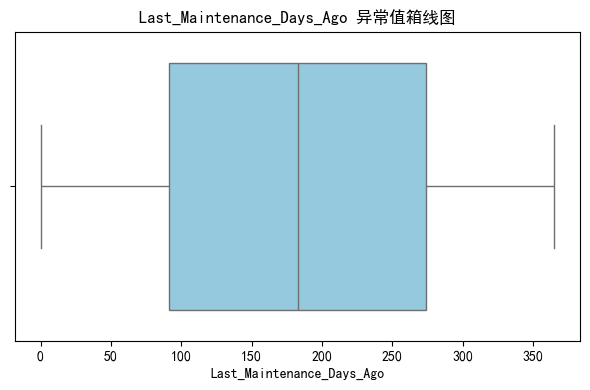

Last_Maintenance_Days_Ago 异常值数量: 0


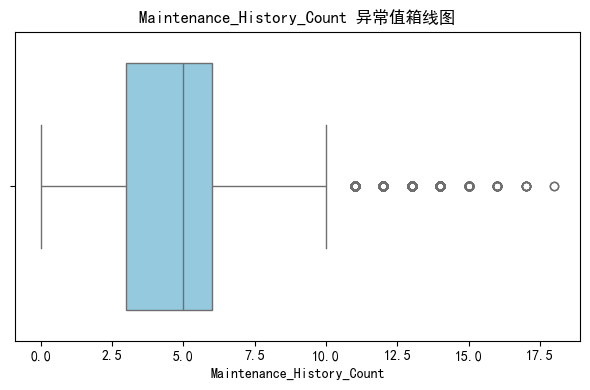

Maintenance_History_Count 异常值数量: 5490


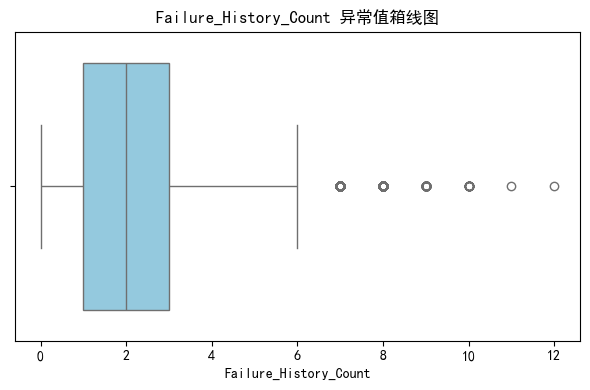

Failure_History_Count 异常值数量: 1790


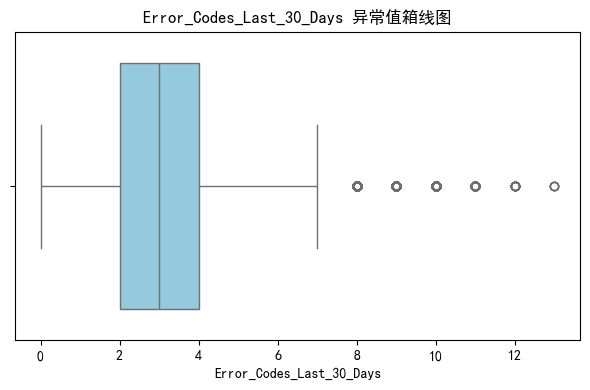

Error_Codes_Last_30_Days 异常值数量: 4663


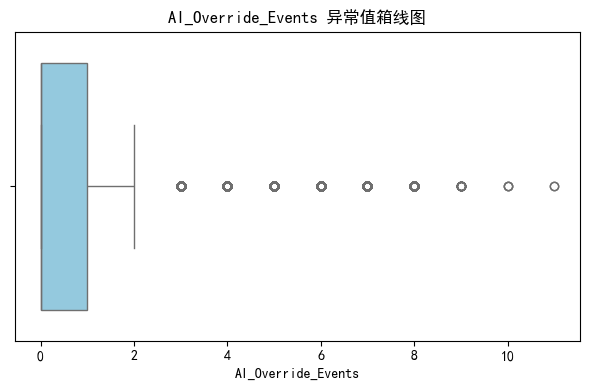

AI_Override_Events 异常值数量: 39038

目标变量 Failure_Within_7_Days 分布：
Failure_Within_7_Days
False    93.96%
True      6.04%
Name: proportion, dtype: object


In [15]:
# 1. 统计重复行数
duplicate_count = df.duplicated().sum()
print(f"数据集中重复行数: {duplicate_count}")

# 2. 正确获取数值特征（排除非特征列）
exclude_cols = ['Machine_ID', 'Failure_Within_7_Days', 'Remaining_Useful_Life_days']
num_cols = [col for col in df.select_dtypes(include=['int64','float64']).columns if col not in exclude_cols]

# 3. 异常值检测及箱线图
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'{col} 异常值箱线图')
    plt.tight_layout()
    plt.savefig(f'boxplot_{col}.png', dpi=300)
    plt.show()

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col} 异常值数量: {outliers.shape[0]}")

# 4. 故障标签分布
print("\n目标变量 Failure_Within_7_Days 分布：")
print(df['Failure_Within_7_Days'].value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))


In [16]:
print(f"数据集总行数: {df.shape[0]}")


数据集总行数: 400000


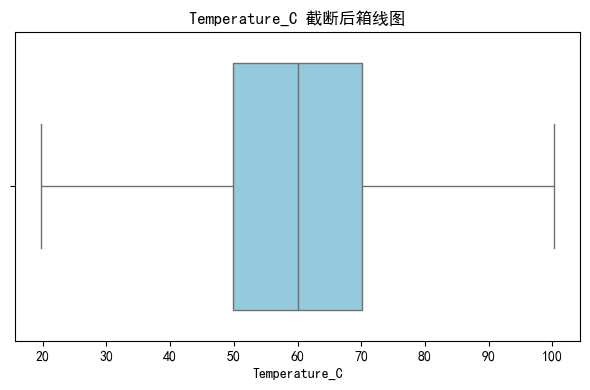

Temperature_C 截断后异常值数量: 0


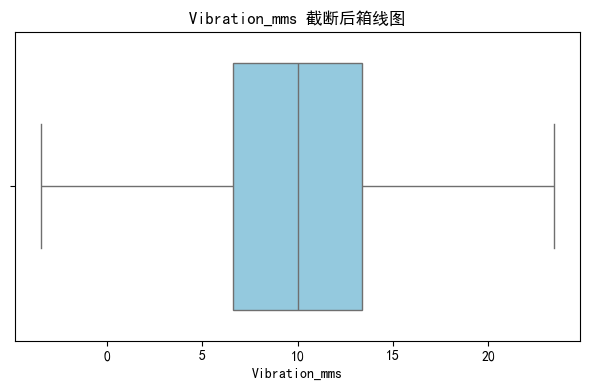

Vibration_mms 截断后异常值数量: 0


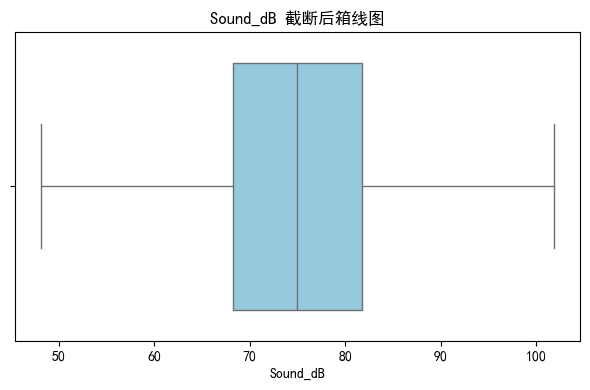

Sound_dB 截断后异常值数量: 0


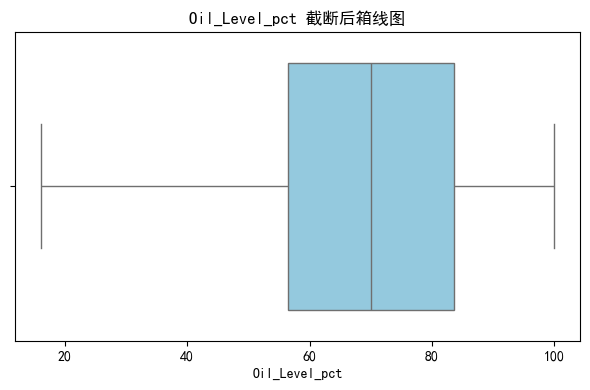

Oil_Level_pct 截断后异常值数量: 0


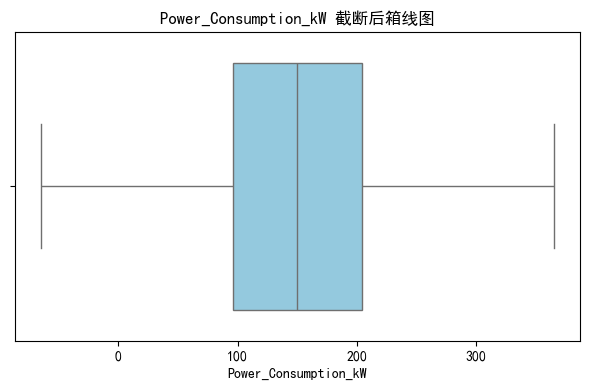

Power_Consumption_kW 截断后异常值数量: 0


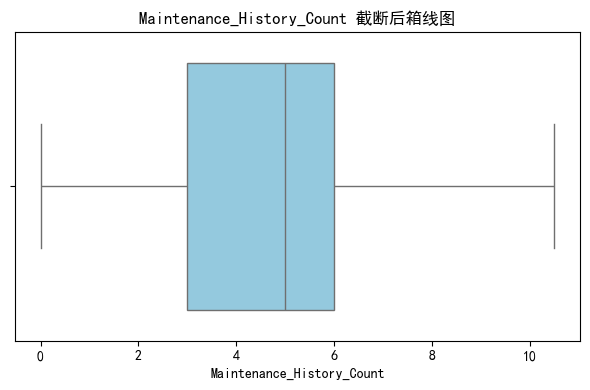

Maintenance_History_Count 截断后异常值数量: 0


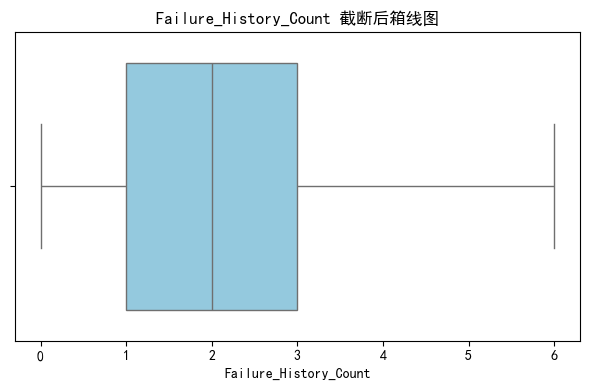

Failure_History_Count 截断后异常值数量: 0


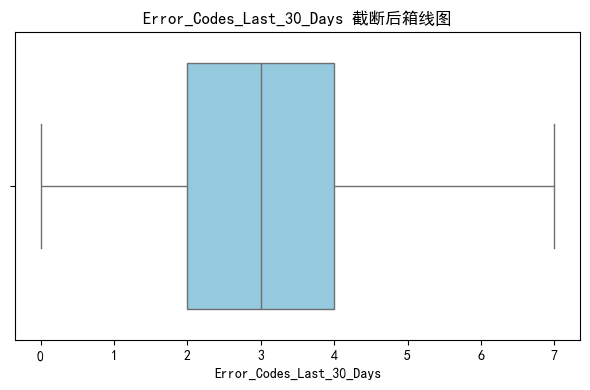

Error_Codes_Last_30_Days 截断后异常值数量: 0


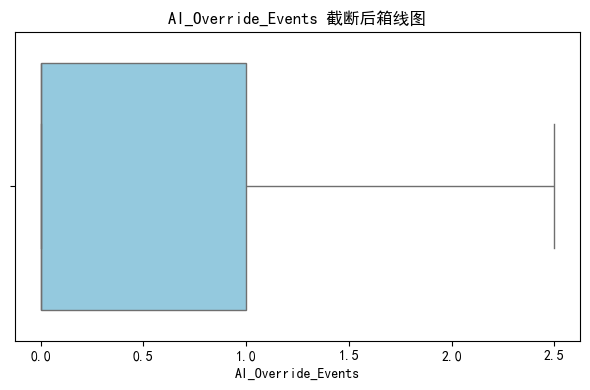

AI_Override_Events 截断后异常值数量: 0


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def clip_outliers(df, features):
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

cols_to_clip = [
    'Temperature_C', 'Vibration_mms', 'Sound_dB', 'Oil_Level_pct',
    'Power_Consumption_kW', 'Maintenance_History_Count',
    'Failure_History_Count', 'Error_Codes_Last_30_Days', 'AI_Override_Events'
]

# 1. 先截断异常值
df = clip_outliers(df, cols_to_clip)

# 2. 重新绘制箱线图并统计异常值数量
for col in cols_to_clip:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'{col} 截断后箱线图')
    plt.tight_layout()
    plt.savefig(f'boxplot_clipped_{col}.png', dpi=300)
    plt.show()

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col} 截断后异常值数量: {outliers.shape[0]}")


In [18]:
# 1. 删除唯一标识列和泄露特征
df = df.drop(columns=['Machine_ID', 'Remaining_Useful_Life_days'])  # 删除泄露特征

# 2. 对 Machine_Type 独热编码
df = pd.get_dummies(df, columns=['Machine_Type'], prefix='Type')

# 3. （独热编码后）确认 Machine_Type 原始列已被替换，无需再删除

# 4. 特征和标签分离
X = df.drop(columns=['Failure_Within_7_Days'])
y = df['Failure_Within_7_Days']

# 5. 划分训练集、验证集、测试集
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.20, random_state=42, stratify=y_train_val)

# 6. 对训练集应用 SMOTE 过采样
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 7. 输出采样前后标签分布确认效果
print("采样前训练集标签分布：")
print(y_train.value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))
print("SMOTE 过采样后训练集标签分布：")
print(y_train_res.value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))


采样前训练集标签分布：
Failure_Within_7_Days
False    93.96%
True      6.04%
Name: proportion, dtype: object
SMOTE 过采样后训练集标签分布：
Failure_Within_7_Days
False    50.00%
True     50.00%
Name: proportion, dtype: object


In [19]:
import optuna
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# 统一交叉验证设置
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# XGBoost调参目标函数
def objective_xgb(trial, X, y):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'random_state': 42,
        'n_jobs': -1,
    }
    model = XGBClassifier(**params)
    scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
    return scores.mean()

# LightGBM调参目标函数
def objective_lgb(trial, X, y):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'random_state': 42,
        'n_jobs': -1,
    }
    model = LGBMClassifier(**params)
    scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
    return scores.mean()

# CatBoost调参目标函数
def objective_cat(trial, X, y):
    params = {
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'iterations': trial.suggest_int('iterations', 50, 300),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_seed': 42,
        'verbose': False,
        'task_type': 'CPU',
    }
    model = CatBoostClassifier(**params)
    scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
    return scores.mean()

# 调用示例（X_train_res, y_train_res为你的SMOTE采样训练集）
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(lambda trial: objective_xgb(trial, X_train_res, y_train_res), n_trials=50)

study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(lambda trial: objective_lgb(trial, X_train_res, y_train_res), n_trials=50)

study_cat = optuna.create_study(direction='maximize')
study_cat.optimize(lambda trial: objective_cat(trial, X_train_res, y_train_res), n_trials=50)

print("XGBoost最佳参数:", study_xgb.best_params)
print("LightGBM最佳参数:", study_lgb.best_params)
print("CatBoost最佳参数:", study_cat.best_params)


[I 2025-07-28 09:00:04,865] A new study created in memory with name: no-name-ada4e4de-143f-42ca-a098-08e3a358aa1a
C:\Users\15514\AppData\Local\Temp\ipykernel_30228\2343993983.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
[I 2025-07-28 09:00:13,977] Trial 0 finished with value: 0.9924646602263637 and parameters: {'max_depth': 6, 'learning_rate': 0.02860970235101315, 'n_estimators': 113, 'subsample': 0.8244504365452034, 'colsample_bytree': 0.9646004935448494, 'reg_alpha': 4.886482628029439, 'reg_lambda': 0.6302689217898311}. Best is trial 0 with value: 0.9924646602263637.
C:\Users\15514\AppData\Local\Temp\ipykernel_30228\2343993983.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

XGBoost最佳参数: {'max_depth': 10, 'learning_rate': 0.26249145760016607, 'n_estimators': 290, 'subsample': 0.8649882167332041, 'colsample_bytree': 0.5489416863270093, 'reg_alpha': 0.2546792370702431, 'reg_lambda': 4.220176615056749}
LightGBM最佳参数: {'max_depth': 14, 'learning_rate': 0.13887799640274243, 'n_estimators': 243, 'num_leaves': 118, 'subsample': 0.93694942721594, 'colsample_bytree': 0.6317324139944669, 'reg_alpha': 0.43425170989194584, 'reg_lambda': 1.940375645383853}
CatBoost最佳参数: {'depth': 7, 'learning_rate': 0.2626986942426071, 'iterations': 286, 'l2_leaf_reg': 5.2138913932862305, 'border_count': 97}


d:\Anaconda\envs\dl2025-py311\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:30:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 240536, number of negative: 240536
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2665
[LightGBM] [Info] Number of data points in the train set: 481072, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
--- XGBoost 指标 ---
准确率: 0.9546
召回率: 0.8270
精确率: 0.5882
F1值: 0.6875

--- LightGBM 指标 ---
准确率: 0.9587
召回率: 0.7913
精确率: 0.6245
F1值: 0.6981

--- CatBoost 指标 ---
准确率: 0.9599
召回率: 0.7750
精确率: 0.6384
F1值: 0.7001



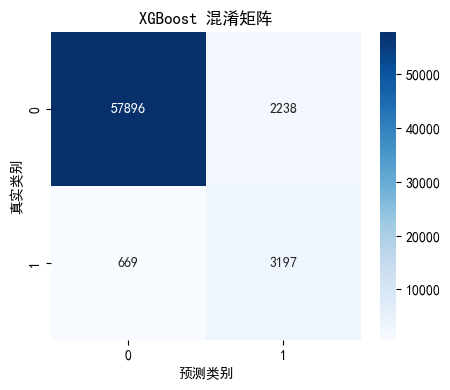

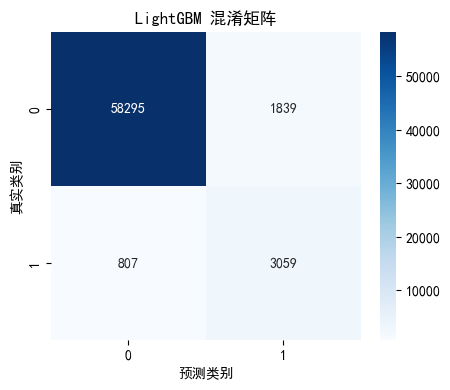

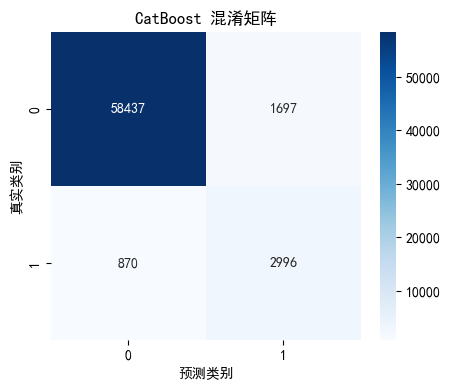

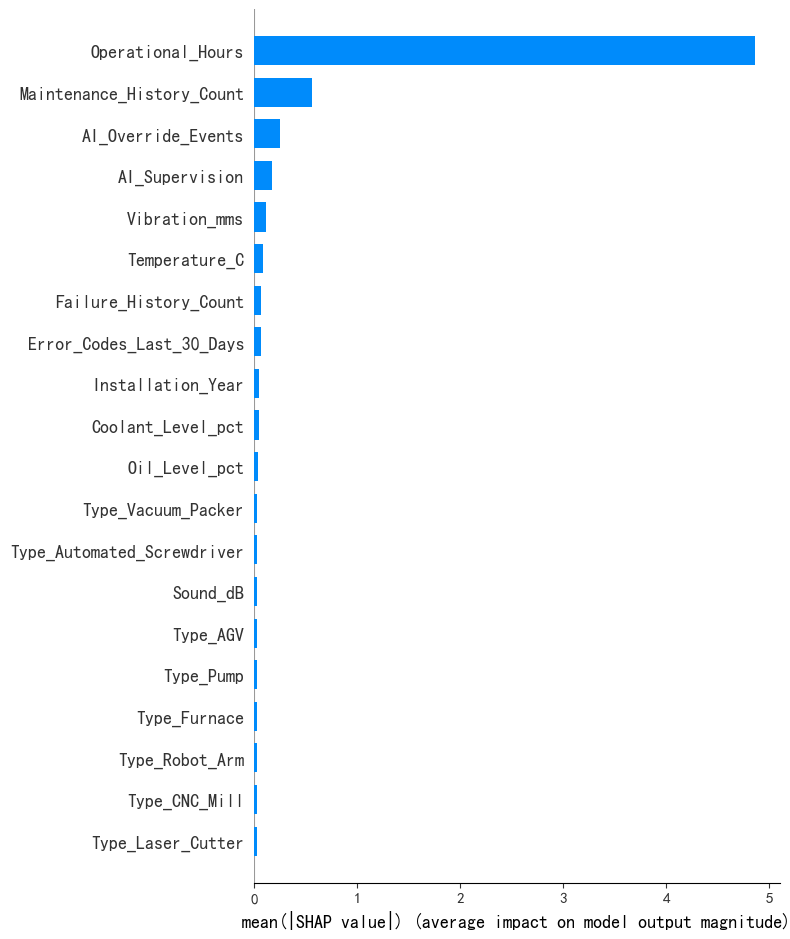

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# 假设你已准备好 SMOTE 过采样后的训练集：X_train_res, y_train_res
# 以及验证集或测试集：X_val, y_val（请替换成你的验证集或测试集）

# 1. 定义最优参数
xgb_best_params = {
    'max_depth': 9,
    'learning_rate': 0.06041074261361949,
    'n_estimators': 143,
    'subsample': 0.8437136076114341,
    'colsample_bytree': 0.6076636871897704,
    'reg_alpha': 0.21290811408426435,
    'reg_lambda': 0.5047101182461411,
    'use_label_encoder': False,
    'eval_metric': 'logloss',
    'random_state': 42,
    'n_jobs': -1,
}

lgb_best_params = {
    'max_depth': 14,
    'learning_rate': 0.19028620123225937,
    'n_estimators': 50,
    'num_leaves': 95,
    'subsample': 0.7535248188836244,
    'colsample_bytree': 0.6235037309140663,
    'reg_alpha': 0.5837519187879499,
    'reg_lambda': 1.7176313824189626,
    'random_state': 42,
    'n_jobs': -1,
}

cat_best_params = {
    'depth': 10,
    'learning_rate': 0.055597196682686235,
    'iterations': 242,
    'l2_leaf_reg': 2.628811515156213,
    'border_count': 255,
    'random_seed': 42,
    'verbose': False,
    'task_type': 'CPU',
}

# 2. 初始化模型
model_xgb = XGBClassifier(**xgb_best_params)
model_lgb = LGBMClassifier(**lgb_best_params)
model_cat = CatBoostClassifier(**cat_best_params)

# 3. 训练模型
model_xgb.fit(X_train_res, y_train_res)
model_lgb.fit(X_train_res, y_train_res)
model_cat.fit(X_train_res, y_train_res)

# 4. 预测验证集
y_pred_xgb = model_xgb.predict(X_val)
y_pred_lgb = model_lgb.predict(X_val)
y_pred_cat = model_cat.predict(X_val)

# 5. 定义评价函数，输出各指标
def print_metrics(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"--- {model_name} 指标 ---")
    print(f"准确率: {acc:.4f}")
    print(f"召回率: {recall:.4f}")
    print(f"精确率: {precision:.4f}")
    print(f"F1值: {f1:.4f}")
    print()

# 6. 打印指标
print_metrics(y_val, y_pred_xgb, "XGBoost")
print_metrics(y_val, y_pred_lgb, "LightGBM")
print_metrics(y_val, y_pred_cat, "CatBoost")

# 7. 混淆矩阵热力图函数
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} 混淆矩阵")
    plt.xlabel("预测类别")
    plt.ylabel("真实类别")
    plt.show()

plot_confusion_matrix(y_val, y_pred_xgb, "XGBoost")
plot_confusion_matrix(y_val, y_pred_lgb, "LightGBM")
plot_confusion_matrix(y_val, y_pred_cat, "CatBoost")

# 8. SHAP解释（以XGBoost为例）
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_val)

plt.figure()
shap.summary_plot(shap_values, X_val, plot_type="bar")


In [31]:
# ======================== 1. 构建 Stacking 模型 ========================
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_score, recall_score, f1_score, roc_curve,
    precision_recall_curve, auc
)
from sklearn.model_selection import cross_val_score
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 假设 X_train, y_train, X_test, y_test 已定义
# 假设 xgb_model, lgb_model, cat_model 已训练完成

# 构造 stacking 模型
estimators = [
    ('xgb', model_xgb),
    ('lgb', model_lgb),
    ('cat', model_cat)
]

stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1,
    passthrough=True
)

stack_model.fit(X_train_res, y_train_res)
y_pred = stack_model.predict(X_test)
y_proba = stack_model.predict_proba(X_test)[:, 1]

# ======================== 2. 输出评估指标 ========================
print("--- StackingClassifier 指标 ---")
print("准确率:", round(stack_model.score(X_test, y_test), 4))
print("精确率:", round(precision_score(y_test, y_pred), 4))
print("召回率:", round(recall_score(y_test, y_pred), 4))
print("F1值:", round(f1_score(y_test, y_pred), 4))

# ======================== 3. 混淆矩阵热力图 ========================
plt.figure(figsize=(5, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("混淆矩阵 - Stacking")
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.show()

# ======================== 4. ROC 曲线 ========================
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Stacking ROC (AUC = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC 曲线")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# # ======================== 6. SHAP 可解释性分析 ========================
# # 转换 bool 到 int
# X_test_numeric = X_test.copy()
# bool_cols = X_test_numeric.select_dtypes(include=['bool']).columns
# X_test_numeric[bool_cols] = X_test_numeric[bool_cols].astype(int)

# # 解释模型
# explainer = shap.Explainer(model_xgb, X_test_numeric)
# shap_values = explainer(X_test_numeric)

# # 绘制图
# shap.summary_plot(shap_values, X_test_numeric, plot_type="bar")
# shap.summary_plot(shap_values, X_test_numeric)

KeyboardInterrupt: 

In [ ]:
df.corr()

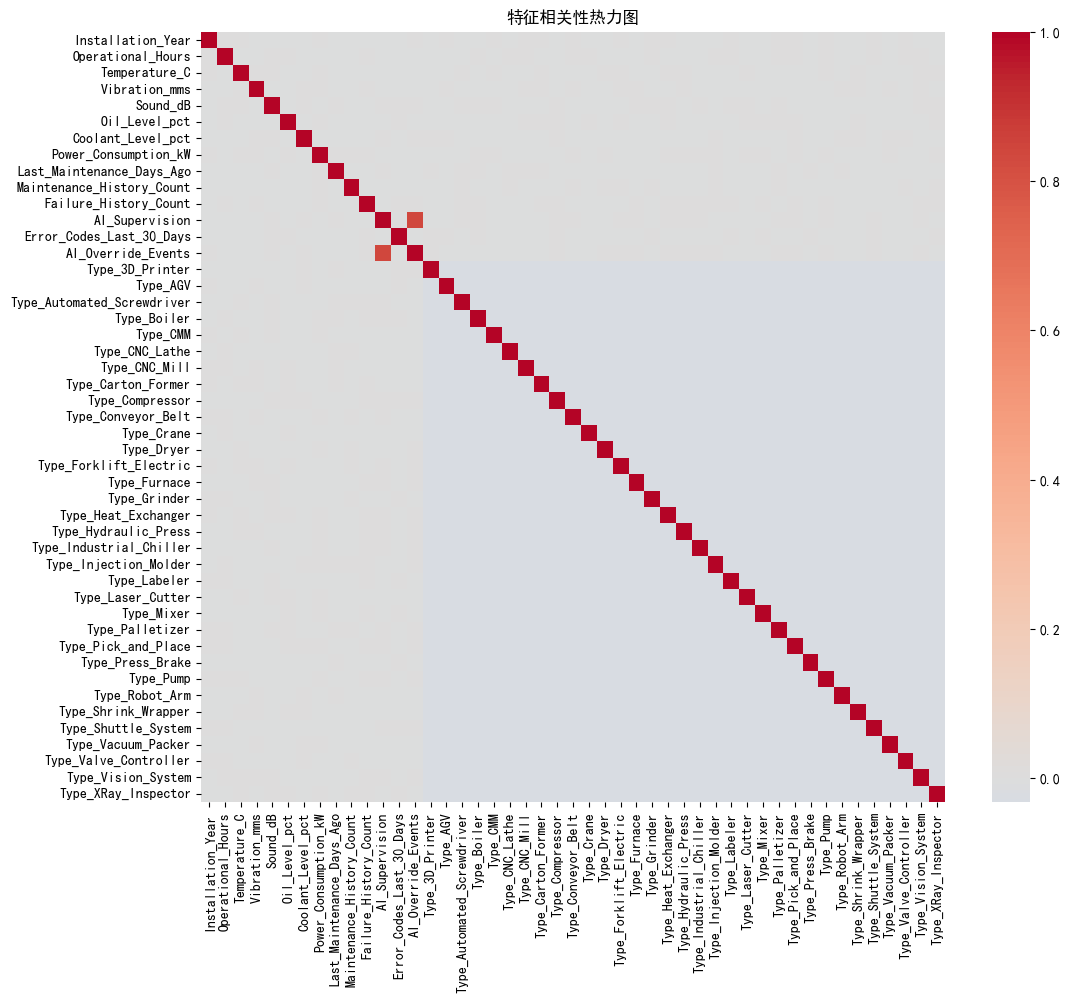

In [28]:
# 1. 画一下热力图看相关性
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
corr = X.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("特征相关性热力图")
plt.show()


In [29]:
# 2. 输出 SHAP 数值表，确认 Operational_Hours 比例有多夸张
shap_df = pd.DataFrame({
    'feature': X_test.columns,
    'mean_abs_shap': np.abs(shap_values).mean(axis=0)
}).sort_values(by='mean_abs_shap', ascending=False)

print(shap_df.head(10))


KeyboardInterrupt: 

In [30]:
df['Operational_Hours'].describe()


count   40000000.00%
mean     5003394.62%
std      2887046.32%
min            0.00%
25%      2506000.00%
50%      5001100.00%
75%      7502700.00%
max     10000000.00%
Name: Operational_Hours, dtype: float64